# Using PyMultiNest

Needs multiNest: https://ccpforge.cse.rl.ac.uk/gf/project/multinest/
 and PyMultiNest: https://github.com/JohannesBuchner/PyMultiNest

Installation: http://johannesbuchner.github.io/PyMultiNest/install.html

### 1. Define the problem

In [2]:
parameters=["x","y"]
n_pars=len(parameters)

In [3]:
def myprior(cube):
    return cube*6-3

In [4]:
def myloglike(cube):
    return -cube[0]**2 - cube[1]**2

### 2. Run MultiNest

In [5]:
import pymultinest

In [6]:
sol=pymultinest.solve( LogLikelihood=myloglike, Prior=myprior, n_dims=n_pars, 
                 outputfiles_basename="mn_", verbose=False)

  analysing data from example/mn_.txt


### 3. Visualize output

In [7]:
import matplotlib.pyplot as plt

In [12]:
a = pymultinest.Analyzer(n_params = n_pars, outputfiles_basename="mn_")
s = a.get_stats()

  analysing data from example/mn_.txt


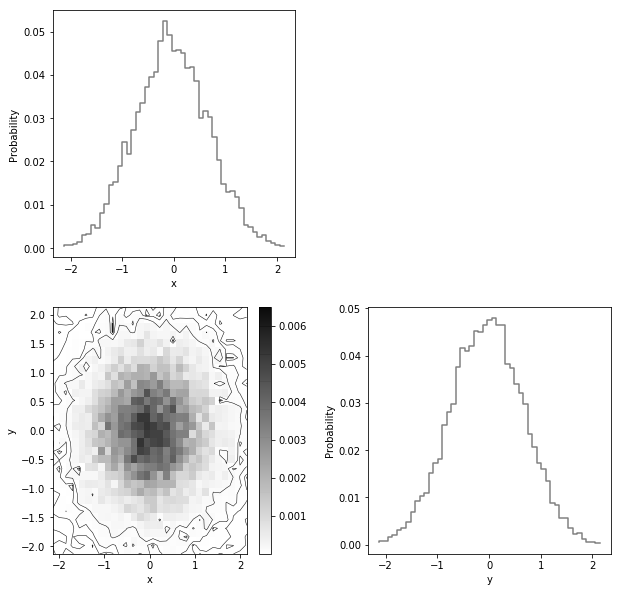

In [13]:
plt.clf()

p = pymultinest.PlotMarginalModes(a)
plt.figure(figsize=(5*n_pars, 5*n_pars))

for i in range(n_pars):
    plt.subplot(n_pars, n_pars, n_pars * i + i + 1)
    p.plot_marginal(i, with_ellipses = True, with_points = False, grid_points=50)
    plt.ylabel("Probability")
    plt.xlabel(parameters[i])
    
    for j in range(i):
        plt.subplot(n_pars, n_pars, n_pars * i + j + 1)
        p.plot_marginal(j, i, with_ellipses = False, with_points = False, grid_points=30)
        plt.xlabel(parameters[j])
        plt.ylabel(parameters[i])

plt.subplots_adjust(wspace=.3)

### 4. Be disappointed, get more samples

In [10]:
def prior(cube,ndims,npar):
    for i in range(ndims):
        cube[i]=cube[i]*6-3
    return

def loglike(cube,ndims,npar):
    return -cube[0]**2 - cube[1]**2

In [11]:
pymultinest.run( loglike, prior, n_pars, 
                 outputfiles_basename="mn_", verbose=False,
                importance_nested_sampling = False, resume = False, n_live_points = 2000, 
                evidence_tolerance = 0.0001, sampling_efficiency = 0.1)

then re-run plot above

# A 'real' example

Model a straight line

In [14]:
import numpy as np

In [15]:
m_sim = 1
c_sim = 1

In [19]:
x_points = np.arange(1,9)

In [21]:
y_data = m_sim * x_points + c_sim + np.random.normal(0, 2, 8)

In [17]:
x_points

array([1, 2, 3, 4, 5, 6, 7, 8])

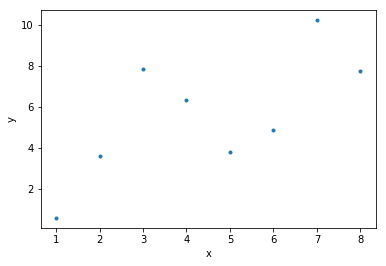

In [22]:
plt.plot(x_points,y_data,'.')
plt.xlabel("x")
plt.ylabel("y")

## Apply Bayesian formalism to find gradient and y-intercept

In [23]:
parameters=["m","c"]
n_pars=len(parameters)

In [24]:
def prior(cube,ndims,npar):
    for i in range(ndims):
        cube[i]=cube[i]*6-2
    return

def loglike(cube,ndims,npar):
    y_test = cube[0]*x_points + cube[1]
    llike = - (y_data-y_test)**2
  
    return llike.sum()

In [25]:
pymultinest.run( loglike, prior, n_pars, 
                 outputfiles_basename="line_", verbose=False,
                importance_nested_sampling = False, resume = False, n_live_points = 2000, 
                evidence_tolerance = 0.001, sampling_efficiency = 0.1)

In [26]:
a = pymultinest.Analyzer(n_params = n_pars, outputfiles_basename="line_")
s = a.get_stats()

  analysing data from example/line_.txt


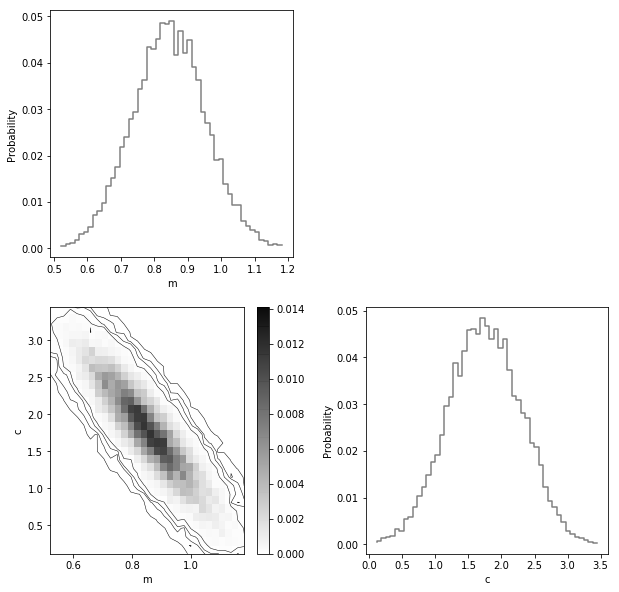

In [27]:
plt.clf()

p = pymultinest.PlotMarginalModes(a)
plt.figure(figsize=(5*n_pars, 5*n_pars))

for i in range(n_pars):
    plt.subplot(n_pars, n_pars, n_pars * i + i + 1)
    p.plot_marginal(i, with_ellipses = True, with_points = False, grid_points=50)
    plt.ylabel("Probability")
    plt.xlabel(parameters[i])
    
    for j in range(i):
        plt.subplot(n_pars, n_pars, n_pars * i + j + 1)
        p.plot_marginal(j, i, with_ellipses = False, with_points = False, grid_points=30)
        plt.xlabel(parameters[j])
        plt.ylabel(parameters[i])

plt.subplots_adjust(wspace=.3)

## Show our model with the data

In [28]:
bf=a.get_mode_stats()
m_measured,c_measured=bf["modes"][0]["mean"]
m_sigma,c_sigma=bf["modes"][0]["sigma"]
print("m="+str(m_measured)+"+/-"+str(m_sigma))
print("c="+str(c_measured)+"+/-"+str(c_sigma))

m=0.851759354897+/-0.109894534705
c=1.78187942528+/-0.555857453049


In [29]:
y_model=m_measured*x_points+c_measured
y_true=m_sim*x_points+c_sim

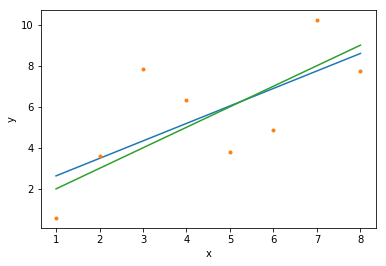

In [30]:
plt.plot(x_points,y_model,
         x_points,y_data,".",
         x_points,y_true)
plt.xlabel("x")
plt.ylabel("y")